# PROJEKTNI ZADATAK - SOM


# 1. Analiza baze podataka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as rnd
import seaborn as sns
import math

In [2]:
data = pd.read_csv('04_breast_cancer_1_dataset.csv')
data.head()
data.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   Tumor-size   286 non-null    object
 4   Inv-nodes    286 non-null    object
 5   Node-caps    286 non-null    object
 6   Deg-malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        276 non-null    int64
 1   Age          276 non-null    int64
 2   Menopause    276 non-null    int64
 3   Tumor-size   276 non-null    int64
 4   Inv-nodes    276 non-null    int64
 5   Node-caps    276 non-null    int64
 6   Deg-malig    276 non-null    int64
 7   Breast       276 non-null    int64
 8   Breast-quad  276 non-null    int64
 9   irradiat     276 non-null    int64
dtypes: int64(10)
memory usage: 23.7 KB


<Figure size 640x480 with 0 Axes>

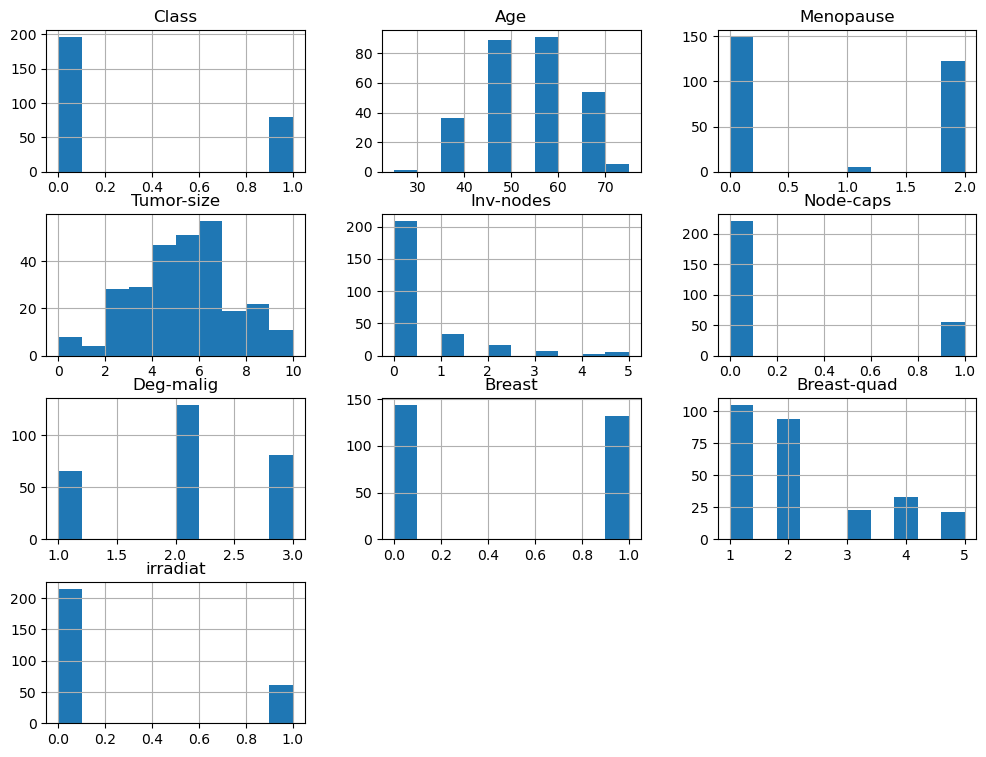

In [3]:
# print(data['Class'].unique())
data.Class = data['Class'].replace('no-recurrence-events', 0)
data.Class = data['Class'].replace('recurrence-events', 1)
#pd.set_option('future.no_silent_downcasting', True)

#print(data['Age'].unique())
data.Age = data['Age'].replace('20-29', 25)
data.Age = data['Age'].replace('30-39', 35)
data.Age = data['Age'].replace('40-49', 45)
data.Age = data['Age'].replace('50-59', 55)
data.Age = data['Age'].replace('60-69', 65)
data.Age = data['Age'].replace('70-79', 75)

#print(data['Menopause'].unique())
data.Menopause = data['Menopause'].replace('premeno', 0)
data.Menopause = data['Menopause'].replace('lt40', 1)
data.Menopause = data['Menopause'].replace('ge40', 2)

#print(data['Tumor-size'].unique())
data['Tumor-size'] = data['Tumor-size'].replace('0-4', 0)
data['Tumor-size'] = data['Tumor-size'].replace('05-Sep', 1)
data['Tumor-size'] = data['Tumor-size'].replace('Oct-14', 2)
data['Tumor-size'] = data['Tumor-size'].replace('15-19', 3)
data['Tumor-size'] = data['Tumor-size'].replace('20-24', 4)
data['Tumor-size'] = data['Tumor-size'].replace('25-29', 5)
data['Tumor-size'] = data['Tumor-size'].replace('30-34', 6)
data['Tumor-size'] = data['Tumor-size'].replace('35-39', 7)
data['Tumor-size']= data['Tumor-size'].replace('40-44', 8)
data['Tumor-size'] = data['Tumor-size'].replace('45-49', 9)
data['Tumor-size'] = data['Tumor-size'].replace('50-54', 10)

#print(data['Inv-nodes'].unique())
#print(data['Inv-nodes'].value_counts().get('24-26'))
data['Inv-nodes'] = data['Inv-nodes'].replace('0-2', 0)
data['Inv-nodes'] = data['Inv-nodes'].replace('03-May', 1)
data['Inv-nodes'] = data['Inv-nodes'].replace('06-Aug', 2)
data['Inv-nodes'] = data['Inv-nodes'].replace('09-Nov', 3)
data['Inv-nodes'] = data['Inv-nodes'].replace('Dec-14', 4)
data['Inv-nodes'] = data['Inv-nodes'].replace('15-17', 5)
data = data.drop(data[data['Inv-nodes'] == '24-26'].index)
data['Inv-nodes'] = data['Inv-nodes'].astype('int64')

#print(data['Node-caps'].unique())
#print(data['Node-caps'].value_counts().get('?'))
data = data.drop(data[data['Node-caps'] == '?'].index)
data['Node-caps'] = data['Node-caps'].replace('no', 0)
data['Node-caps'] = data['Node-caps'].replace('yes', 1)

#print(data['Deg-malig'].unique())

#print(data['Breast'].unique())
data.Breast = data['Breast'].replace('left', 0)
data.Breast = data['Breast'].replace('right', 1)

#print(data['Breast-quad'].unique())
#print(data['Breast-quad'].value_counts().get('?'))
data = data.drop(data[data['Breast-quad'] == '?'].index)
data['Breast-quad'] = data['Breast-quad'].replace('left_low', 1)
data['Breast-quad'] = data['Breast-quad'].replace('left_up', 2)
data['Breast-quad'] = data['Breast-quad'].replace('right_low', 3)
data['Breast-quad'] = data['Breast-quad'].replace('right_up', 4)
data['Breast-quad'] = data['Breast-quad'].replace('central', 5)

#print(data['irradiat'].unique())
data.irradiat = data['irradiat'].replace('no', 0)
data.irradiat= data['irradiat'].replace('yes', 1)

#print(data.to_string())
data.info(verbose=True)
data.describe().T

plt.figure()
data.hist(bins = 10, figsize=(12,9))
plt.show()

# 2.1. Informaciona dobit

In [4]:
def calculateInfoD(col):
    un = np.unique(col)
    infoD = 0
    for u in un:
        p = sum(col == u)/len(col)
        infoD -= p*np.log2(p)
    return infoD

klasa = data.iloc[:,0]

infoD = calculateInfoD(klasa)
print('Info(D) = ' + str(infoD))

Info(D) = 0.8685339602652349


In [5]:
IG = []
for ob in range(1,10):
    kol = data.iloc[:, ob]
    f = np.unique(kol)
    
    infoDA = 0
    for i in f:
        temp = klasa[kol == i]

        infoDi = calculateInfoD(temp)
        Di = sum(kol == i)
        D = len(kol)

        infoDA += Di*infoDi/D
    
    IG.append([data.columns[ob], infoD - infoDA])

IGdf = pd.DataFrame(IG, columns=['obelezje', 'IG'])
IGsorted = IGdf.sort_values(by=['IG'], ascending=False, ignore_index=True)
IGsorted

,obelezje,IG
0,Deg-malig,0.085685
1,Inv-nodes,0.076270
2,Tumor-size,0.061806
3,Node-caps,0.052764
4,irradiat,0.032220
5,Age,0.020600
6,Menopause,0.012078
7,Breast-quad,0.008378
8,Breast,0.000944


# 2.2. Korelaciona analiza

Pirsonov koeficijent korelacije

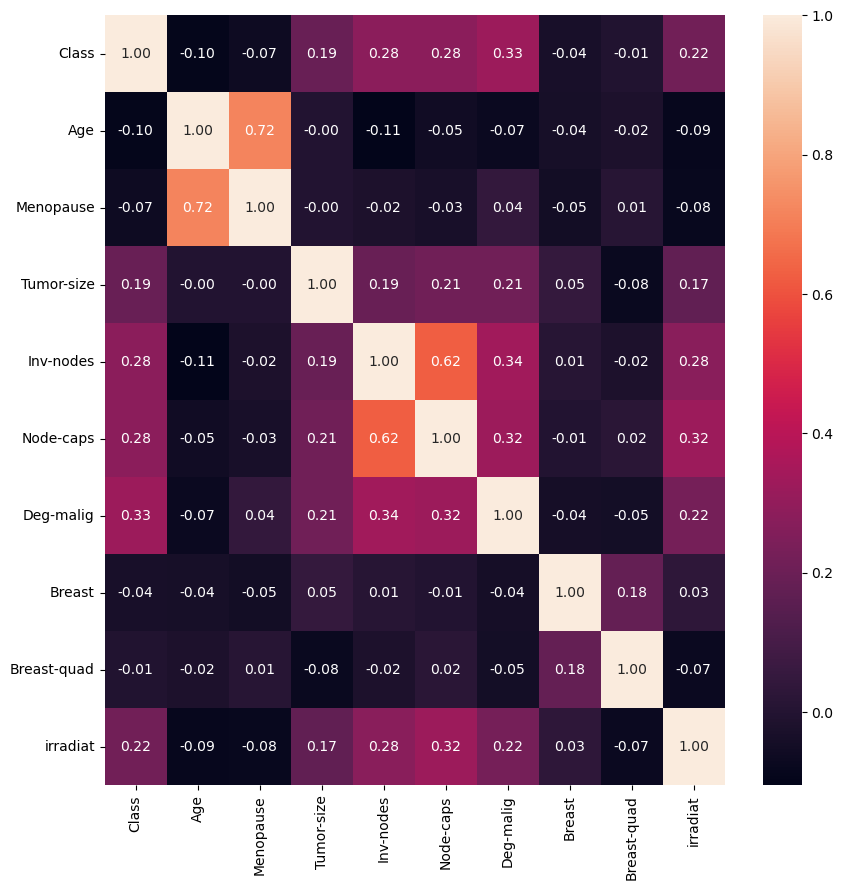

In [6]:
pearson_R = data.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(pearson_R, annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.show()

Spirmanov koeficijent korelacije

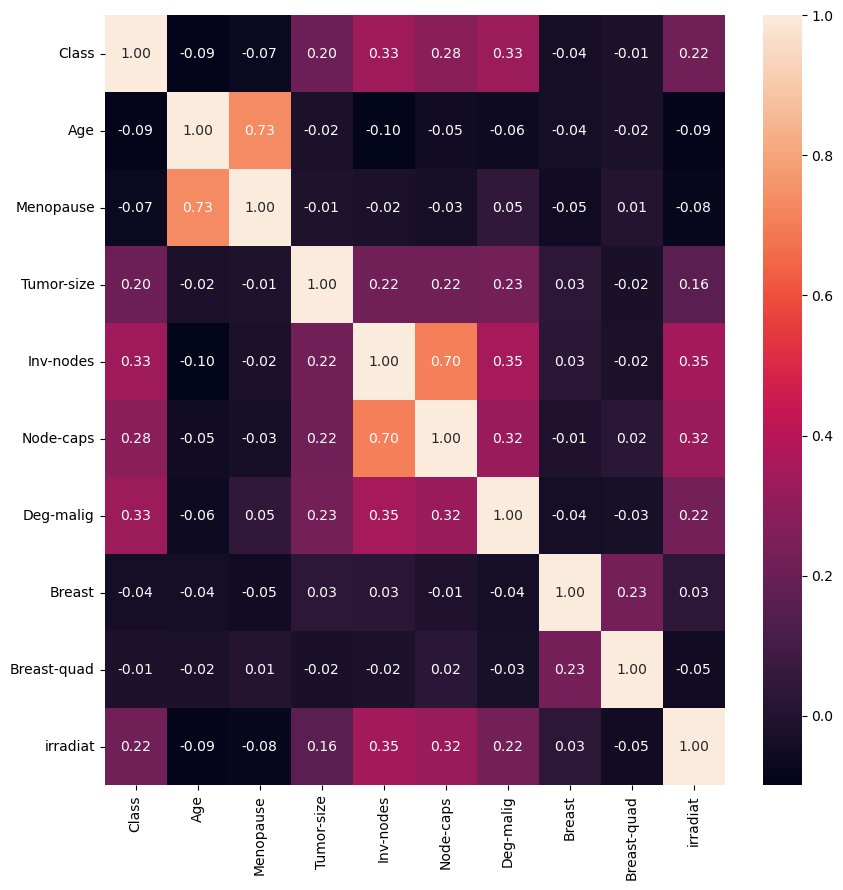

In [7]:
spearman_R = data.corr(method='spearman')
plt.figure(figsize=(10, 10))
sns.heatmap(spearman_R, annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.show()

Raspodela odbiraka sa najvećim koeficijentom korelacije sa klasom

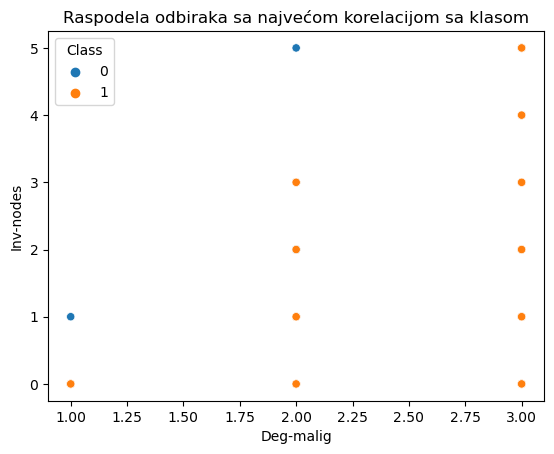

In [8]:
sns.scatterplot(data=data, x='Deg-malig', y='Inv-nodes', hue='Class')
plt.title('Raspodela odbiraka sa najvećom korelacijom sa klasom')
plt.xlabel('Deg-malig')
plt.ylabel('Inv-nodes')
plt.legend(title='Class')
plt.show()

# 3. LDA metoda za redukciju dimenzija

100 %


C:\Users\Dell\AppData\Local\Temp\ipykernel_15580\384103602.py:17: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Klasa 0', 'Klasa 1')


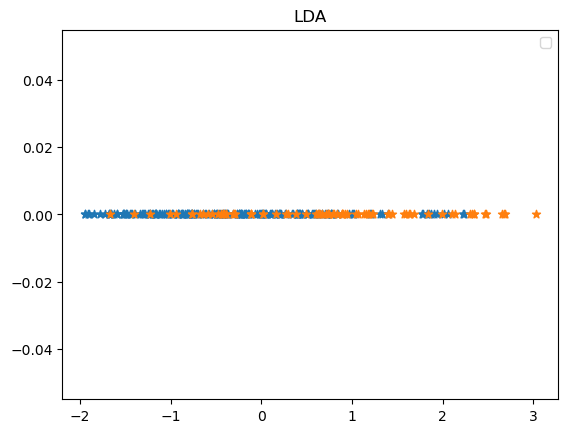

In [15]:
#lda ugradjena fja
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X,y)

explained_variance_ratio = lda.explained_variance_ratio_
print(int(explained_variance_ratio)*100, '%')

plt.figure()
plt.scatter(X_lda[y==0], np.zeros((1,np.sum(y==0))), marker='*')
plt.scatter(X_lda[y==1], np.zeros((1,np.sum(y==1))), marker='*')
plt.title('LDA')
plt.legend('Klasa 0', 'Klasa 1')
plt.show()

# 4. Parametarska klasifikacija

Nakon primene LDA analize dolazimo do zaključka da klase nisu dovoljno separabile, tako da prelazimo na klasifikator na bazi testiranja hipoteza.

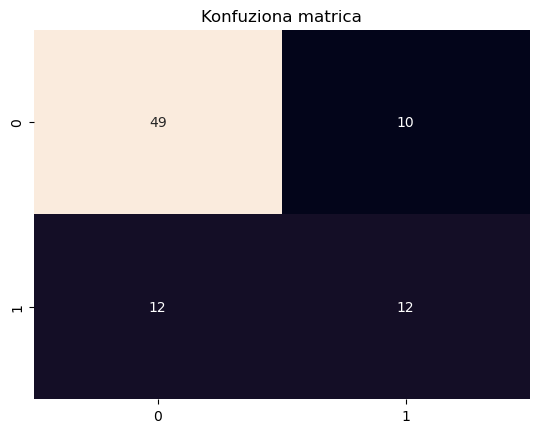

73.49397590361446


In [18]:
data_new = data[['Deg-malig', 'Inv-nodes', 'Class']]
X_new = data_new.iloc[:,:-1]
y_new = data_new.iloc[:, -1]

X_new_norm = X_new - np.mean(X_new, axis=0)
X_new_norm /= np.std(X_new, axis=0)

X1_new = X_new_norm.loc[y_new == 0, :]
X2_new = X_new_norm.loc[y_new == 1, :]

N1 = X1_new.shape[0]
N2 = X2_new.shape[0]

N1trening = int(0.7*N1)
X1_trening = X1_new.iloc[:N1trening, :]
X1_test = X1_new.iloc[N1trening:, :]

N2trening = int(0.7*N2)
X2_trening = X2_new.iloc[:N2trening, :]
X2_test = X2_new.iloc[N2trening:, :]

M1p = np.mean(X1_trening, axis=0)
S1p = np.cov(X1_trening.T)
#print('Matematicko ocekivanje K1: ' + str(M1p))
#print('Kovarijaciona matrica K1: \n' + str(S1p))

M2p = np.mean(X2_trening, axis=0)
S2p = np.cov(X2_trening.T)
#print('Matematicko ocekivanje K2: ' + str(M2p))
#print('Kovarijaciona matrica K2: \n' + str(S2p))

def izracunaj_fgv(x, m, s):
    det = np.linalg.det(s)
    inv = np.linalg.inv(s)
    x_mu = x - m
    
    fgv_const = 1/np.sqrt(2*np.pi*det)
    fgv_rest = np.exp(-0.5*x_mu.T@inv@x_mu)
    return fgv_const*fgv_rest

p1 = N1trening / (N1trening + N2trening)
p2 = N2trening / (N1trening + N2trening)
T = np.log(p1/p2)

odluka1 = np.zeros((N1-N1trening, 1))
for i in range(N1-N1trening):
    x1 = X1_test.iloc[i, :]                
    f1 = izracunaj_fgv(x1, M1p, S1p)
    f2 = izracunaj_fgv(x1, M2p, S2p)
    h1 = -np.log(f1) + np.log(f2)
    if h1 < T:
        odluka1[i] = 0
    else:
        odluka1[i] = 1

odluka2 = np.zeros((N2-N2trening, 1))        
for i in range(N2-N2trening):    
    x2 = X2_test.iloc[i, :]                
    f1 = izracunaj_fgv(x2, M1p, S1p)
    f2 = izracunaj_fgv(x2, M2p, S2p)
    h2 = -np.log(f1) + np.log(f2)
    if h2 < T:
        odluka2[i] = 0
    else:
        odluka2[i] = 1
        
odluka = np.append(odluka1, odluka2, axis=0)
Xtest = np.append(X1_test, X2_test, axis=0)
Ytest = np.append(np.zeros((N1-N1trening, 1)), np.ones((N2-N2trening, 1)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Ytest, odluka)
plt.figure()
plt.title('Konfuziona matrica')
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(tacnost)

# 5. Neparametarska klasifikacija

In [19]:
X = data.drop('Class', axis=1).values
Y = data['Class'].values

In [20]:
from sklearn.model_selection import train_test_split
Xtrening, Xtest, Ytrening, Ytest = train_test_split(X, Y, train_size=0.7, random_state=42, stratify=Y)

In [21]:
from sklearn.metrics import accuracy_score

k = 10
pred = np.zeros((Xtest.shape[0],))
for i in range(Xtest.shape[0]):
    tren_test = Xtest[i, :]
    dist = np.zeros((Xtrening.shape[0],))
    for j in range(Xtrening.shape[0]):
        tren_trening = Xtrening[j, :]
        dist[j] = np.sqrt(np.sum((tren_test - tren_trening)**2))
        
    idx = np.argsort(dist)[:k]
    najblizi_klase = Ytrening[idx]
    
    val, cnt = np.unique(najblizi_klase, return_counts=True)
    
    pred[i] = val[np.argmax(cnt)]

acc = accuracy_score(Ytest, pred)
print('Tacnost klasifikacije je : ' + str(acc*100) + '%.')

Tacnost klasifikacije je : 67.46987951807229%.


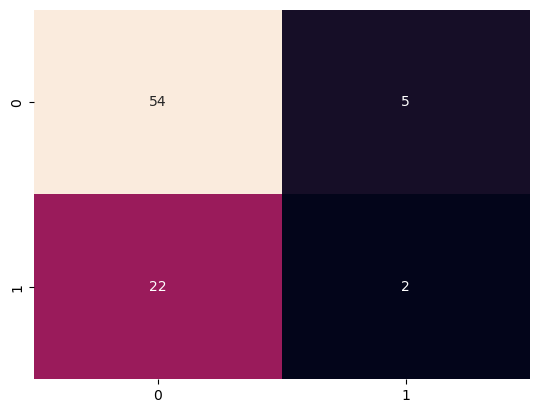

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Ytest, pred)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

neighbours = np.arange(1, 100, 2)
acc = np.zeros((neighbours.size))
for i in range(neighbours.size):
    knn_model = KNN(n_neighbors=neighbours[i])
    knn_model.fit(Xtrening, Ytrening)
    y_pred_knn = knn_model.predict(Xtest)
    acc[i] = accuracy_score(Ytest, y_pred_knn)

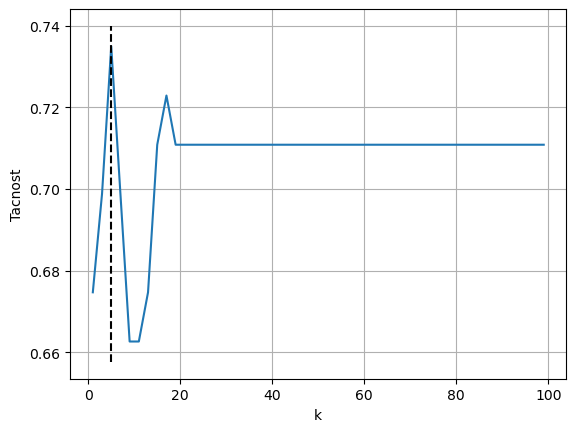

Najbolja tacnost se dobija za K = 5 i iznosi 73.49397590361446%.


In [24]:
bestAcc = np.max(acc)
bestK = neighbours[np.argmax(acc)]

plt.figure()
plt.plot(neighbours, acc)

plt.plot([bestK, bestK], [np.min(acc)-0.005, np.max(acc)+0.005], 'k--')
plt.xlabel('k')
plt.ylabel('Tacnost')
plt.grid()
plt.show()

print('Najbolja tacnost se dobija za K = ' + str(bestK) + ' i iznosi ' + str(bestAcc*100) + '%.')


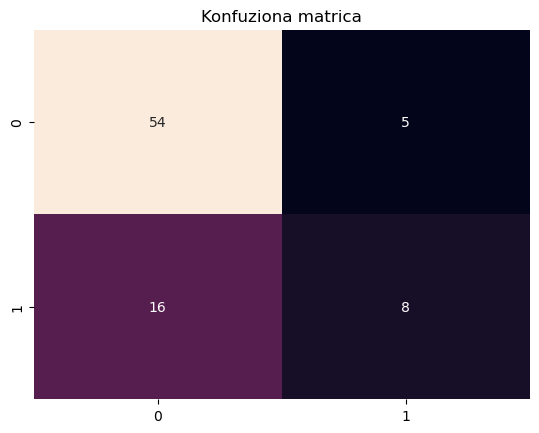

In [25]:
k = 5
pred = np.zeros((Xtest.shape[0],))
for i in range(Xtest.shape[0]):
    tren_test = Xtest[i, :]
    dist = np.zeros((Xtrening.shape[0],))
    for j in range(Xtrening.shape[0]):
        tren_trening = Xtrening[j, :]
        dist[j] = np.sqrt(np.sum((tren_test - tren_trening)**2))
        
    idx = np.argsort(dist)[:k]
    najblizi_klase = Ytrening[idx]
    
    val, cnt = np.unique(najblizi_klase, return_counts=True)
    
    pred[i] = val[np.argmax(cnt)]

conf_mat = confusion_matrix(Ytest, pred)
plt.figure()
plt.title('Konfuziona matrica')
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()


## 6. Neuralne mreze

In [26]:
import keras
from keras import Sequential
from keras.layers import Dense

## Jedan skriveni sloj - primer sa preobucavanjem

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 350)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           351 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


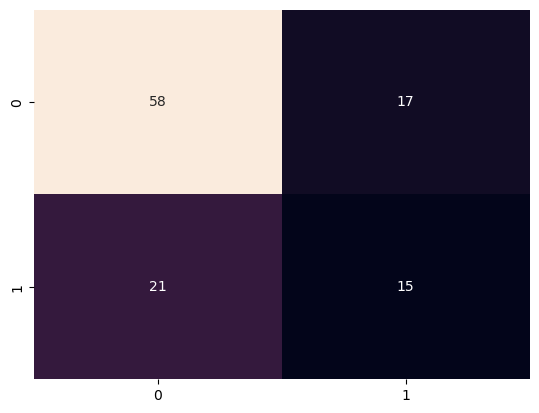

93.33333333333333
65.76576576576578


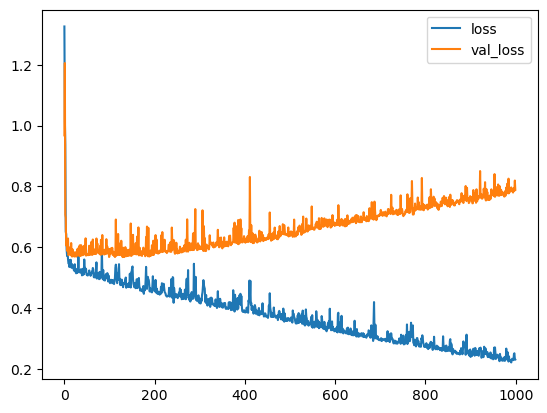

In [45]:
X = data.iloc[:, 1:].values
D = data.iloc[:, 0].values

K0 = X[D == 0]
K1 = X[D == 1]

Xtrening,Xtest,Dtrening,Dtest=train_test_split(X,D,test_size=0.4, shuffle = True, random_state=20)

# JEDAN SKRIVENI SLOJ SA 350 NEURONA, 0.4 test size
model=Sequential()
model.add(Dense(350,activation='relu', input_dim = X.shape[1]))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 1000
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss']) 

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)

## Sprecavanje preobucavanja - Rano zaustavljanje

Epoch 30: early stopping


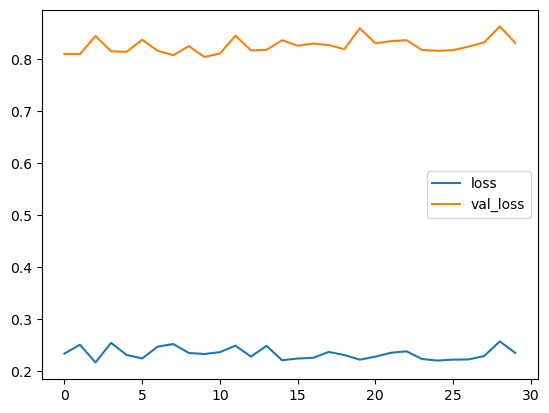

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


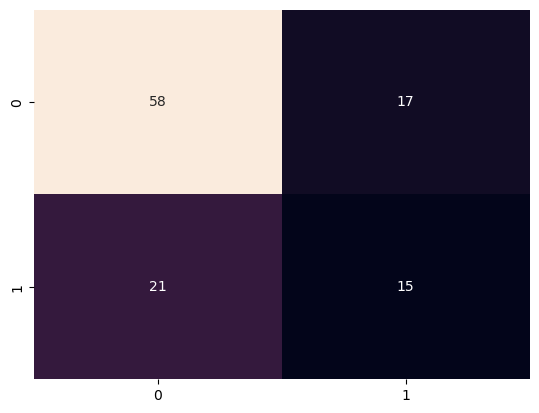

92.12121212121212
65.76576576576578


In [38]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history = model.fit(x=Xtrening, y=Dtrening, 
                    epochs=1000,
                    batch_size=32, 
                    validation_data=(Xtest, Dtest), 
                    shuffle=True,
                    callbacks=[es],
                    verbose=0,
                   )


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)


plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)

## Sprecavanje preobucavanja - Regularizacija

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 350)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           351 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,851 (15.04 KB)

 Trainable params: 3,851 (15.04 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


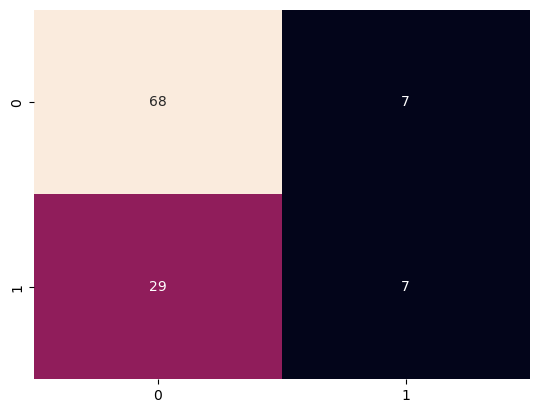

78.78787878787878
67.56756756756756


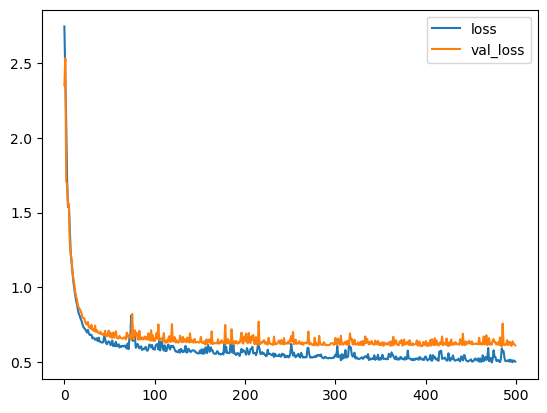

In [39]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(350,activation='relu',input_dim=X.shape[1],kernel_regularizer=l2(0.08)))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 500
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)


## Mali broj neurona

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 5)              │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


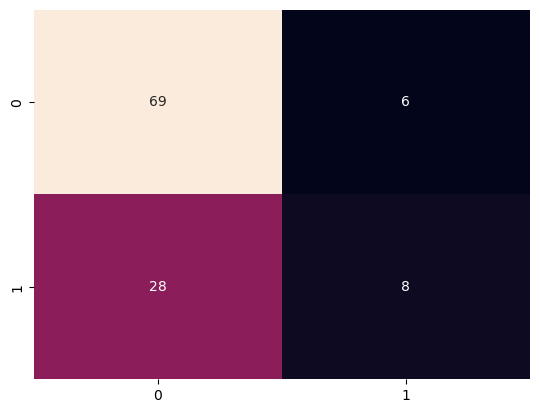

75.75757575757575
69.36936936936937


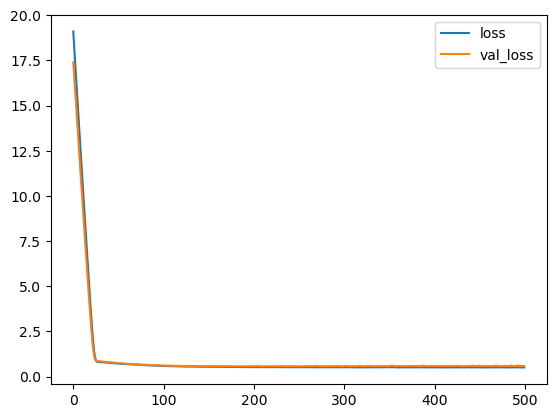

In [40]:
model = Sequential()
model.add(Dense(5,activation='relu',input_dim=X.shape[1],))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 500
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)

## Preobucavanje - troslojna mreza

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 60)             │         6,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │         1,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,301 (32.43 KB)

 Trainable params: 8,301 (32.43 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


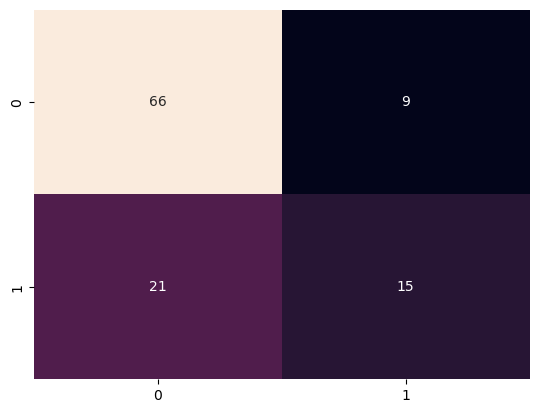

86.06060606060606
72.97297297297297


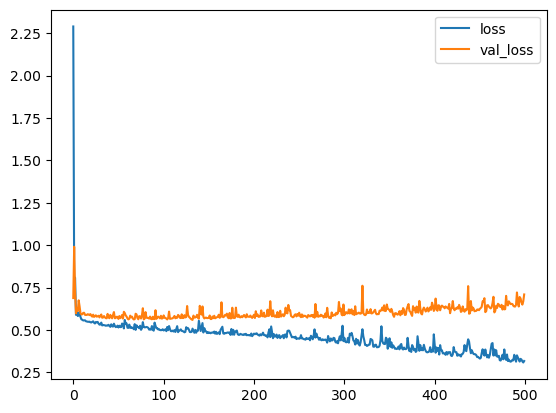

In [41]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=X.shape[1],))
model.add(Dense(60,activation='relu',input_dim=X.shape[1],))
model.add(Dense(20,activation='relu',input_dim=X.shape[1],))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 500
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)

Epoch 24: early stopping


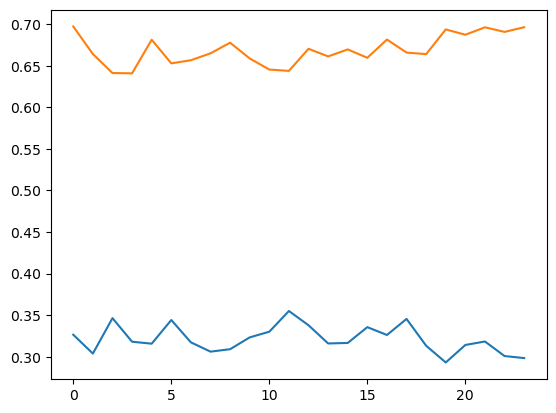

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


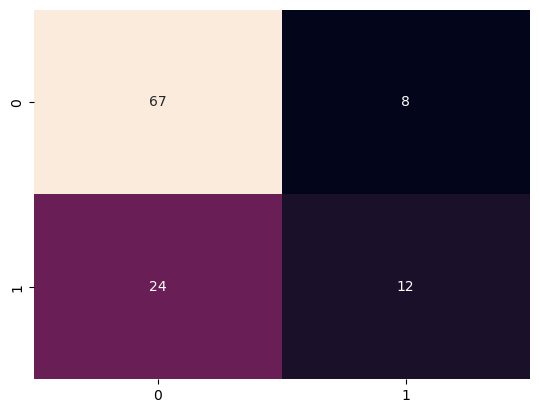

86.06060606060606
71.17117117117117


In [42]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history = model.fit(x=Xtrening, y=Dtrening, 
                    epochs=500,
                    batch_size=32, 
                    validation_data=(Xtest, Dtest), 
                    shuffle=True,
                    callbacks=[es],
                    verbose=0,
                   )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)


plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 200)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,201 (8.60 KB)

 Trainable params: 2,201 (8.60 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


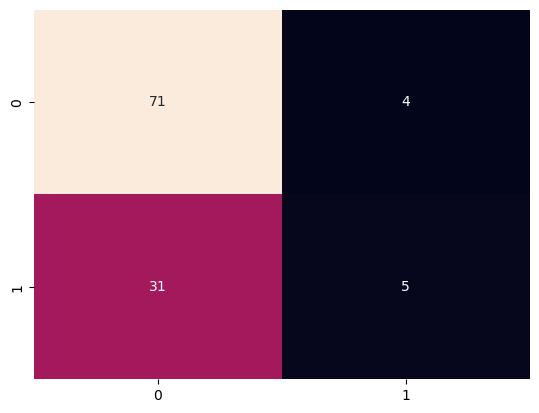

76.36363636363637
68.46846846846847


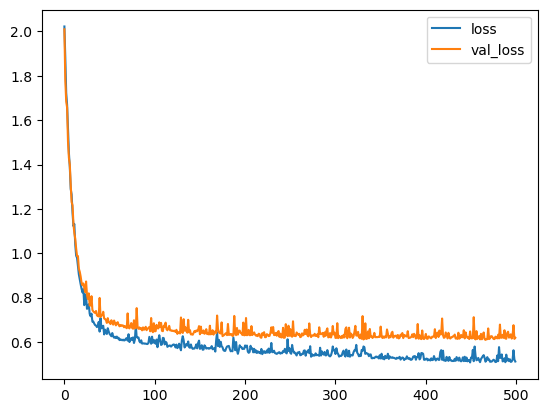

In [43]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(200,activation='relu',input_dim=X.shape[1],kernel_regularizer=l2(0.08)))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 500
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)


## Optimalna struktura neuralne mreze

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 14)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 6)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


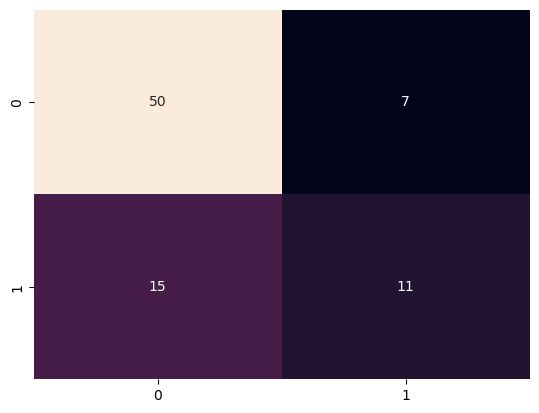

73.05699481865285
73.49397590361446


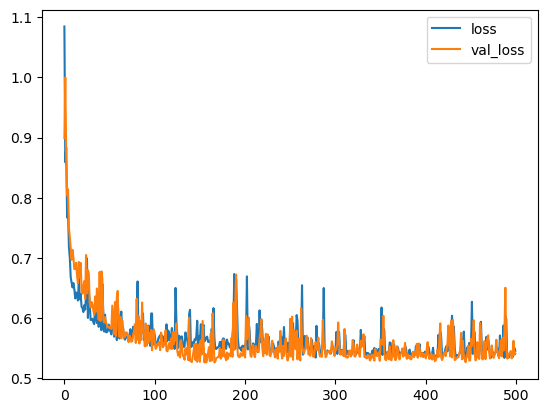

In [51]:
Xtrening,Xtest,Dtrening,Dtest=train_test_split(X,D,test_size=0.3, shuffle = True, random_state=20)

model = Sequential()
model.add(Dense(14,activation='relu',input_dim=X.shape[1],))
model.add(Dense(6,activation='relu',input_dim=X.shape[1],))
#model.add(Dense(3,activation='relu',input_dim=X.shape[1],))
model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


max_epoha = 500
history = model.fit(x=Xtrening, y=Dtrening,epochs=max_epoha, batch_size=32, shuffle=32,verbose=0, validation_data=(Xtest,Dtest))

Ypred = model.predict(Xtest)
Ypred = np.round(Ypred)
conf_mat = confusion_matrix(Dtest,Ypred)

plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='g',cbar=False)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

YpredTrening = model.predict(Xtrening,verbose=0)
YpredTrening = np.round(YpredTrening)
YpredTest = model.predict(Xtest,verbose=0)
YpredTest = np.round(YpredTest)

accTrening = accuracy_score(Dtrening,YpredTrening)
print(accTrening*100)
accTest = accuracy_score(Dtest,YpredTest)
print(accTest*100)